# Displaying the /proc/pressure based metrics

In [1]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Baseline

In [2]:
with open('pressure-metrics/pressure-normal.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [3]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
# data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

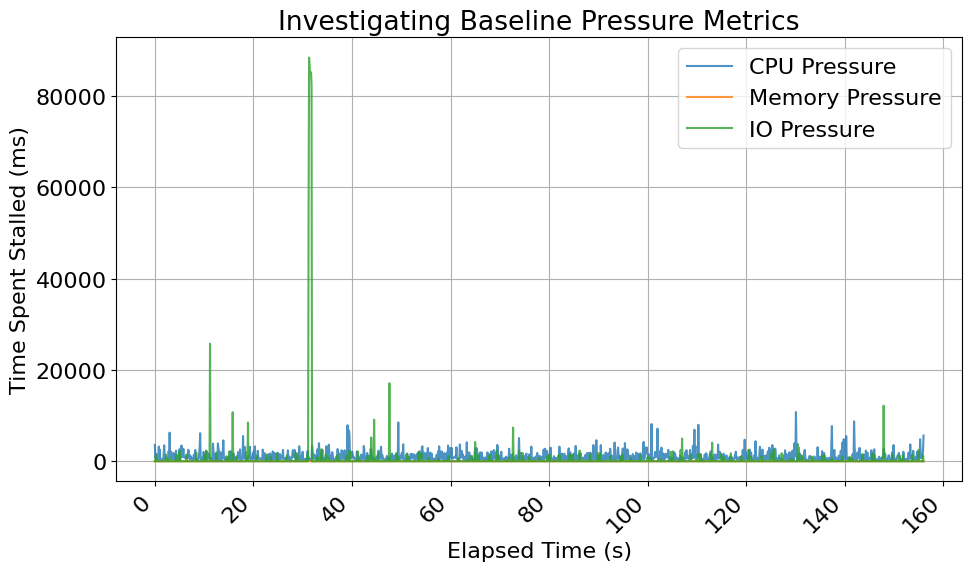

In [10]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]
start = time_objects[0]
time_objects = [(time - start).total_seconds() for time in time_objects]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.rcParams['font.size'] = 16  

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

# Customize the plot
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Baseline Pressure Metrics")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-baseline.png')
plt.show()

## Single

In [33]:
with open('pressure-metrics/pressure-single.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [34]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
#data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

In [35]:
with open('pressure-metrics/pressure-single.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [36]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

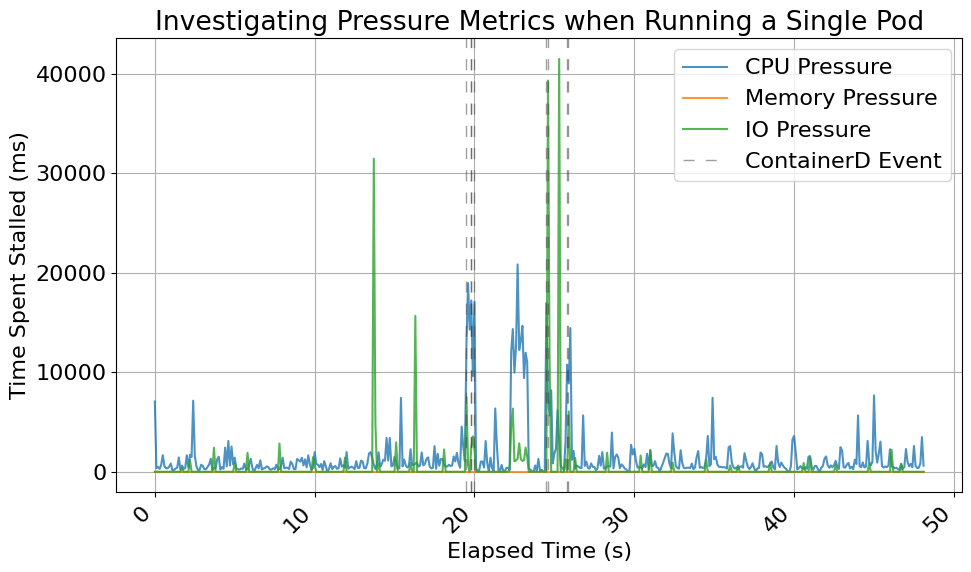

In [37]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]
start = time_objects[0]
time_objects = [(time - start).total_seconds() for time in time_objects]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.rcParams['font.size'] = 16  

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

count = 0
for event in events_dict.keys():
    # Assuming events[event] is a list of time strings for that event
    event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
    event_times_objects = [(time - start).total_seconds() for time in event_times_objects]
    for event_time_obj in event_times_objects:
        plt.axvline(x=event_time_obj, color='0.25', alpha=0.5, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
        count += 1

# Customize the plot
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Pressure Metrics when Running a Single Pod")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-single.png')
plt.show()

## Small Churn - 5 Pods

In [27]:
with open('pressure-metrics/pressure-smallchurn.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [28]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
# data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

In [29]:
with open('pressure-metrics/pressure-smallchurn.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [30]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

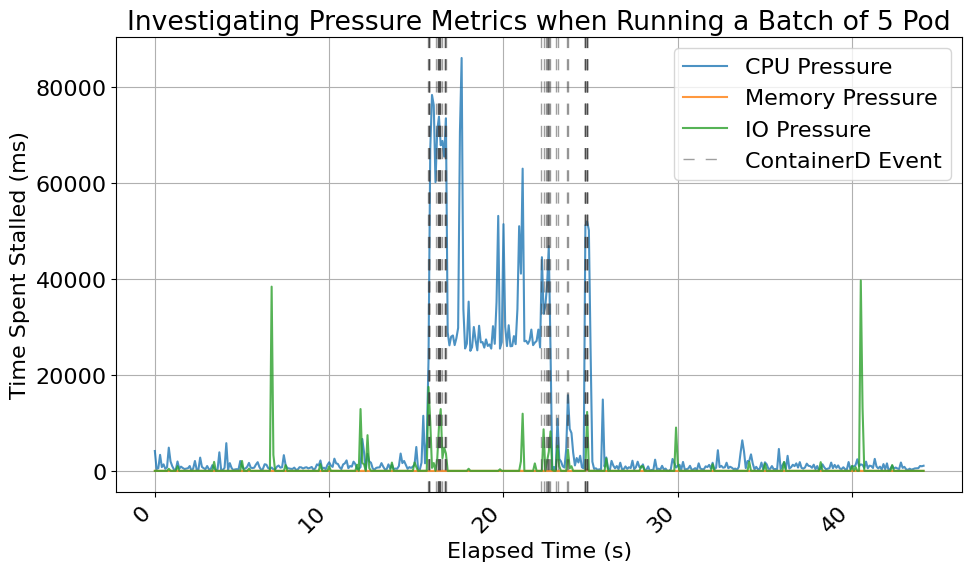

In [32]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]
start = time_objects[0]
time_objects = [(time - start).total_seconds() for time in time_objects]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.rcParams['font.size'] = 16  

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

count = 0
for event in events_dict.keys():
    # Assuming events[event] is a list of time strings for that event
    event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
    event_times_objects = [(time - start).total_seconds() for time in event_times_objects]
    for event_time_obj in event_times_objects:
        plt.axvline(x=event_time_obj, color='0.25', alpha=0.5, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
        count += 1

# Customize the plot
plt.xlabel("Elapsed Time (s)")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Pressure Metrics when Running a Batch of 5 Pod")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-smallbatch.png')
plt.show()

## Churn - 10 Pods

In [38]:
with open('pressure-metrics/pressure-churn.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(metrics)" in line]

In [39]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['CPU Pressure'] = [int(line.split()[5]) for line in filtered]
# data['cpu full'] = [int(line.split()[7]) for line in filtered]
#data['memory some'] = [int(line.split()[10]) for line in filtered]
data['Memory Pressure'] = [int(line.split()[12]) for line in filtered]
data['IO Pressure'] = [int(line.split()[15]) for line in filtered]
#data['io full'] = [int(line.split()[17]) for line in filtered]

In [40]:
with open('pressure-metrics/pressure-churn.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [41]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

In [ ]:
# 1. Parse time strings into datetime objects
time_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in data['time']]
start = time_objects[0]
time_objects = [(time - start).total_seconds() for time in time_objects]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.rcParams['font.size'] = 16  

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

count = 0
for event in events_dict.keys():
    # Assuming events[event] is a list of time strings for that event
    event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
    event_times_objects = [(time - start).total_seconds() for time in event_times_objects]
    for event_time_obj in event_times_objects:
        plt.axvline(x=event_time_obj, color='0.25', alpha=0.5, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
        count += 1
# Customize the plot
plt.xlabel("Time")
plt.ylabel("Time Spent Stalled (ms)")
plt.title("Investigating Pressure Metrics when Running a Batch of 10 Pods")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/pressure-bigbatch.png')
plt.show()